# 0.0) Introdução.

Através de um DataFrame de diversas cidades, através de algumas variáveis criaremos um modelo de previsão de crimes na cidade.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv('dataframe_exercicio_modulo_8.csv')
df.head()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


In [3]:
df.shape

(2460, 5)

# 1.0 ) Dividindo o dataframe.

Antes de analisa-lo faremos a divisão 50/25/25 isto é: 50% para treino, 25% para validação e 25% para testar.

In [4]:
df_train=df[0:int(df.shape[0]*0.5)]
df_valid=df[int(df.shape[0]*0.5):int(df.shape[0]*0.75)]
df_test=df[int(df.shape[0]*0.75):int(df.shape[0]*1)+1]

In [5]:
df_train.shape

(1230, 5)

In [6]:
df_valid.shape

(615, 5)

In [7]:
df_test.shape

(615, 5)

# 2.0) Escolhendo uma única variável para a previsão.

Para isso será necessário estudarmos cada uma das variáveis e trata-las, se necessário.
Entender qual é mais interessante através de modelos estatísticos e manipulaçoes algébricas.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ind_pop_cid  2460 non-null   float64
 1   perc_pol     2460 non-null   float64
 2   taxa_crim    2460 non-null   float64
 3   nivel_ed     2460 non-null   float64
 4   crimes       2460 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 96.2 KB


In [9]:
df.describe()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.080488,16.032527,64.945933,5.093089,177.607724
std,1.423109,10.466474,23.551127,2.827254,119.851061
min,1.000000,0.014848,0.644731,1.000000,0.000000
25%,2.000000,7.093529,47.604707,3.000000,77.000000
50%,3.000000,14.843907,68.809210,5.000000,157.000000
75%,4.000000,23.669780,84.670920,7.000000,265.000000
max,5.000000,45.147573,99.997355,10.000000,529.000000


Analisando os números, estas variáveis aparentemente já estão tratadas, não possui dados nulos e nenhum outlier que não faça sentido. 

Vemos que existe um outlier na variável crimes, onde o maximo foi 529, porém ainda assim ele é condizente.

# 2.1) Estudando as correlações das variáveis.


 **ind_pop_cid e crimes** :
 

In [10]:
df_train['ind_pop_cid'].corr(df_train.crimes)

0.056637406445672306

In [11]:
for variavel in df_train.columns:
    print('Correlação de %s e crimes'%variavel, df_train['%s'%variavel].corr(df_train.crimes))

Correlação de ind_pop_cid e crimes 0.056637406445672306
Correlação de perc_pol e crimes -0.3796420869323822
Correlação de taxa_crim e crimes 0.5823365049451648
Correlação de nivel_ed e crimes -0.19953906090618267
Correlação de crimes e crimes 1.0


A variável **taxa_crim** foi a que performou melhor no estudo de correlaçao com a nossa variável target.
Portanto, partirei desta variável para gerar o modelo de previsão com variável única.

# 3.0 ) Visualizando a relação de taxa_crim e crimes.

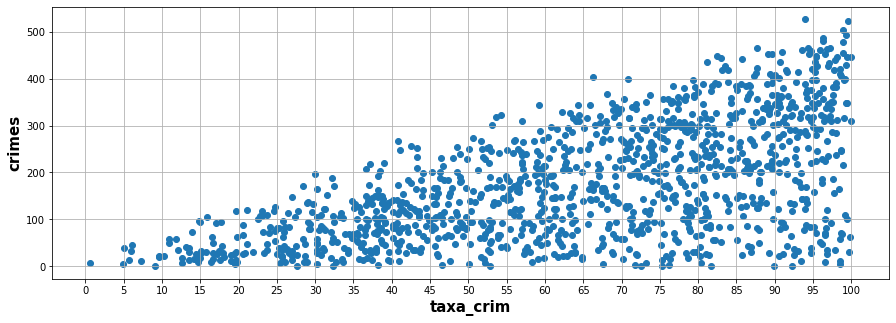

In [12]:
plt.figure(figsize=[15,5])
plt.grid(True)
plt.scatter(x=df_train['taxa_crim'],y=df_train.crimes)
plt.xlabel('taxa_crim',fontweight='bold',fontsize=15)
plt.xticks(np.arange(0, 101, step=5))
plt.ylabel('crimes',fontweight='bold',fontsize=15)
plt.yticks(rotation=0)

plt.show()

 # 3.1) Gerando um regressão linear.
 
Vamos gerar uma regressão linear a fim de gerarmos uma reta que melhor interprete os dados.

Através do resultado dela, poderemos até usa-la como um modelo de predição.

In [13]:
lr=LinearRegression()

In [14]:
x_train01=df_train['taxa_crim'].values.reshape(-1,1)
y_target01=df_train['crimes']


In [15]:
lr.fit(x_train01,y_target01)

LinearRegression()

In [16]:
y_pred01=lr.predict(x_train01)


# 3.2) Mensurando a assertividade através do RMSE.

In [17]:
def RMSE(y,y_pred):
    
    return np.mean(((y-y_pred)**2)**0.5)

In [18]:
RMSE(y=df_train['crimes'],y_pred=y_pred01)

78.31392716037304

Com um RMSE de 78.32, aparentemente esta variável taxa_crim apresentou um bom resultado(pelo menos durante o treino).


# 3.3 ) Visualizando a regressão.

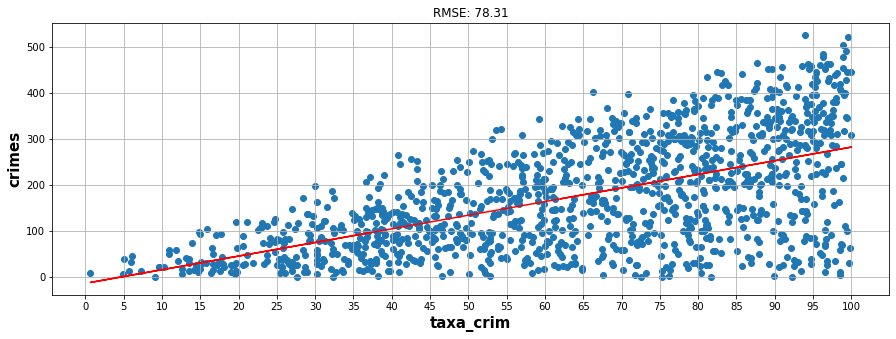

In [19]:
plt.figure(figsize=[15,5])
plt.grid(True)

plt.title('RMSE: %s'%round(RMSE(y=df_train['crimes'],y_pred=y_pred01),2))
plt.scatter(x=df_train['taxa_crim'],y=df_train.crimes)
plt.plot(x_train01,y_pred01,c='red')
plt.xlabel('taxa_crim',fontweight='bold',fontsize=15)
plt.xticks(np.arange(0, 101, step=5))
plt.ylabel('crimes',fontweight='bold',fontsize=15)
plt.yticks(rotation=0)

plt.show()

# 3.4) Validando nosso modelo de predição por regressão.

Agora usaremos nossa relação entre as variáveis taxa_crim e crimes no nosso df_valid.

In [20]:
x_valid01=df_valid['taxa_crim'].values.reshape(-1,1)
y_target02=df_valid['crimes']

In [21]:
lr.fit(x_valid01,y_target02)

LinearRegression()

In [22]:
y_pred02=lr.predict(x_valid01)

In [23]:
RMSE(y=y_target02,y_pred=y_pred02)

80.96500522056249

Com um RMSE bem próximo ao do nosso modelo de treino, de fato nosso modelo de regressão aparenta estar perfomando bem.

No treino teve um RMSE de 78.32 e agora na validação teve um RMSE de 80.97.

# 3.5 Visualizando a validação.

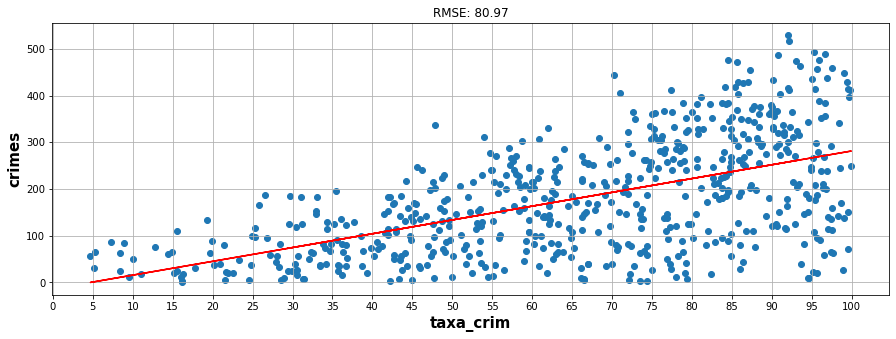

In [24]:
plt.figure(figsize=[15,5])
plt.grid(True)

plt.title('RMSE: %s'%round(RMSE(y=df_valid['crimes'],y_pred=y_pred02),2))
plt.scatter(x=df_valid['taxa_crim'],y=df_valid.crimes)
plt.plot(x_valid01,y_pred02,c='red')
plt.xlabel('taxa_crim',fontweight='bold',fontsize=15)
plt.xticks(np.arange(0, 101, step=5))
plt.ylabel('crimes',fontweight='bold',fontsize=15)
plt.yticks(rotation=0)

plt.show()

In [25]:
df_aux01=pd.DataFrame({'crimes':df_valid['crimes'],'crimes_predict':y_pred02})
df_aux01.head(10)

,crimes,crimes_predict
1230,205,261.103435
1231,24,74.532102
1232,329,252.292368
1233,123,94.349595
1234,214,126.429646
1235,147,182.371550
1236,247,230.029838
1237,215,158.149729
1238,172,192.346732
1239,384,235.480886


 Olhando par a par, vimos que o modelo não fez previsões tão boas assim, vamos olhar através do modelo de KNN para ver se alcançamos resultados melhores.

# 4.0 ) KNN

Usaremos o metódo KNN no dataframe de treino,  escolheremos aquele que performar melhor para o dataframe de validação.

In [26]:
x_train02=df_train['taxa_crim'].values.reshape(-1,1)


In [27]:
for vizinho in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=vizinho)
    knn.fit(x_train02,y_target01)
    y_pred03=knn.predict(x_train02)
    rmse_aprox=round(RMSE(y=y_target01,y_pred=y_pred03),2)
    print('O RMSE %s foi de '%rmse_aprox,'para',vizinho,'vizinhos.','\n')


O RMSE 0.0 foi de  para 1 vizinhos. 

O RMSE 54.48 foi de  para 2 vizinhos. 

O RMSE 62.13 foi de  para 3 vizinhos. 

O RMSE 65.96 foi de  para 4 vizinhos. 

O RMSE 68.86 foi de  para 5 vizinhos. 

O RMSE 70.53 foi de  para 6 vizinhos. 

O RMSE 71.59 foi de  para 7 vizinhos. 

O RMSE 72.68 foi de  para 8 vizinhos. 

O RMSE 73.77 foi de  para 9 vizinhos. 

O RMSE 74.41 foi de  para 10 vizinhos. 

O RMSE 74.7 foi de  para 11 vizinhos. 

O RMSE 75.07 foi de  para 12 vizinhos. 

O RMSE 75.33 foi de  para 13 vizinhos. 

O RMSE 75.49 foi de  para 14 vizinhos. 

O RMSE 75.91 foi de  para 15 vizinhos. 

O RMSE 75.87 foi de  para 16 vizinhos. 

O RMSE 75.96 foi de  para 17 vizinhos. 

O RMSE 76.07 foi de  para 18 vizinhos. 

O RMSE 76.31 foi de  para 19 vizinhos. 

O RMSE 76.73 foi de  para 20 vizinhos. 

O RMSE 76.75 foi de  para 21 vizinhos. 

O RMSE 76.72 foi de  para 22 vizinhos. 

O RMSE 76.86 foi de  para 23 vizinhos. 

O RMSE 76.99 foi de  para 24 vizinhos. 

O RMSE 76.93 foi de  para 25

Notamos neste loop que a tendência do RMSE foi crescente junto com o crescimento da quantidade de vizinhos abordados.

Aquele que performou melhor foi com 2 vizinhos.

# 4.1 ) Validando a hipótese.

Nossa hipótese é de que o modelo está performando melhor com 2 vizinhos. 

Vamos validar isto através do dataframe de validação.

In [28]:
for vizinho in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=vizinho)
    knn.fit(x_valid01,y_target02)
    y_pred04=knn.predict(x_valid01)
    rmse_aprox=round(RMSE(y=y_target02,y_pred=y_pred04),2)
    print('O RMSE %s foi de '%rmse_aprox,'para',vizinho,'vizinhos.','\n')

O RMSE 0.0 foi de  para 1 vizinhos. 

O RMSE 53.22 foi de  para 2 vizinhos. 

O RMSE 61.65 foi de  para 3 vizinhos. 

O RMSE 65.49 foi de  para 4 vizinhos. 

O RMSE 68.79 foi de  para 5 vizinhos. 

O RMSE 70.76 foi de  para 6 vizinhos. 

O RMSE 71.84 foi de  para 7 vizinhos. 

O RMSE 72.51 foi de  para 8 vizinhos. 

O RMSE 73.32 foi de  para 9 vizinhos. 

O RMSE 73.72 foi de  para 10 vizinhos. 

O RMSE 73.98 foi de  para 11 vizinhos. 

O RMSE 74.24 foi de  para 12 vizinhos. 

O RMSE 73.97 foi de  para 13 vizinhos. 

O RMSE 74.46 foi de  para 14 vizinhos. 

O RMSE 75.18 foi de  para 15 vizinhos. 

O RMSE 75.33 foi de  para 16 vizinhos. 

O RMSE 75.59 foi de  para 17 vizinhos. 

O RMSE 75.66 foi de  para 18 vizinhos. 

O RMSE 75.77 foi de  para 19 vizinhos. 

O RMSE 76.34 foi de  para 20 vizinhos. 

O RMSE 76.08 foi de  para 21 vizinhos. 

O RMSE 76.26 foi de  para 22 vizinhos. 

O RMSE 76.33 foi de  para 23 vizinhos. 

O RMSE 76.37 foi de  para 24 vizinhos. 

O RMSE 76.44 foi de  para 2

De fato, a hipotése que com 2 vizinhos o RMSE estava sendo mais efetivo foi verdadeiro no dataframe de validação.

Inclusive, recebendo um RMSE menor do que utilizando a regressão linear,
53.22 comparado a 80.97.

# 4.2) Visualizando a validação.

In [29]:
knn=KNeighborsRegressor(n_neighbors=2)

In [30]:
knn.fit(x_valid01,y_target02)

KNeighborsRegressor(n_neighbors=2)

In [31]:
y_pred04=knn.predict(x_valid01)

In [32]:
df_aux02=pd.DataFrame({'crimes':df_valid['crimes'],'crimes_predict':y_pred04})
df_aux02.head(10)


,crimes,crimes_predict
1230,205,265.0
1231,24,104.0
1232,329,381.0
1233,123,79.5
1234,214,169.0
1235,147,202.5
1236,247,235.0
1237,215,221.5
1238,172,129.0
1239,384,236.5


É apenas ao olhar para os resultados, visualizamos que o modelo 02 atravésdo KNN e com 2 vizinhos, performou muito bem.

Mas é interessante conseguir mensurar o quão melhor foi.

# 5.0) Mensurando a assertividade.

Geraremos uma espécie de **"outlier"** para identificar se o valor previsto foi dentro do estimado.

Estabeleceremos uma **margem de erro** de 20%

Por exemplo: Caso o valor real fosse de 100 e o estimado ficasse entre 80 e 120, ele estaria dentro desta margem de erro.

Logo, seria um valor aceitavel.




In [33]:
margens=[]
for x in range(df_aux02.shape[0]):
    margem_minima=df_aux02.crimes.tolist()[x] -0.2*df_aux02.crimes.tolist()[x]
    margem_maxima=df_aux02.crimes.tolist()[x] + 0.2*df_aux02.crimes.tolist()[x]
    if margem_minima<=df_aux02['crimes_predict'].tolist()[x]<=margem_maxima:

        margens.append(1)
    else: 
        margens.append(0)






In [34]:
df_aux02_2=pd.DataFrame({'crimes':df_valid['crimes'],'crimes_predict':y_pred04,'Aceitabilidade':margens})


In [35]:
df_aux02_2.head(10)

,crimes,crimes_predict,Aceitabilidade
1230,205,265.0,0
1231,24,104.0,0
1232,329,381.0,1
1233,123,79.5,0
1234,214,169.0,0
1235,147,202.5,0
1236,247,235.0,1
1237,215,221.5,1
1238,172,129.0,0
1239,384,236.5,0


In [36]:
margens2=[]
for x in range(df_aux01.shape[0]):
    margem_minima=df_aux01.crimes.tolist()[x] -0.2*df_aux01.crimes.tolist()[x]
    margem_maxima=df_aux01.crimes.tolist()[x] + 0.2*df_aux01.crimes.tolist()[x]
    if margem_minima<=df_aux01['crimes_predict'].tolist()[x]<=margem_maxima:

        margens2.append(1)
    else: 
        margens2.append(0)


In [37]:
df_aux01_2=pd.DataFrame({'crimes':df_valid['crimes'],'crimes_predict':y_pred02,'Aceitabilidade':margens2})


In [38]:
df_aux01_2.head(10)

,crimes,crimes_predict,Aceitabilidade
1230,205,261.103435,0
1231,24,74.532102,0
1232,329,252.292368,0
1233,123,94.349595,0
1234,214,126.429646,0
1235,147,182.371550,0
1236,247,230.029838,1
1237,215,158.149729,0
1238,172,192.346732,1
1239,384,235.480886,0


# 5.1) Verificando a aceitabilidade do modelo.

In [39]:
print('Taxa de assertividade:',round(df_aux01_2['Aceitabilidade'].sum()/df_aux01_2.shape[0],4)*100,'%')

Taxa de assertividade: 23.25 %


In [40]:
print('Taxa de assertividade:',round(df_aux02_2['Aceitabilidade'].sum()/df_aux02_2.shape[0],4)*100,'%')

Taxa de assertividade: 39.51 %


De fato, o nosso modelo de KNN, com 2 vizinhos ele possuiu uma Assertividade maior.

Em outras palavras, os valores estimados por ele com uma margem de erro de 20% foi mais assertivo do que o do primeiro modelo baseado em regressão linear.

# 6.0 ) Hands on !

Agora que já validamos nossa hipótese vamos ver o quão assertivo nosso modelo será na pratica.

Vamos para o nosso dataframe de teste.

In [41]:
x_test01=df_test['taxa_crim'].values.reshape(-1,1)
y_target03=df_test['crimes']

In [42]:
knn=KNeighborsRegressor(n_neighbors=2)

In [43]:
knn.fit(x_test01,y_target03)

KNeighborsRegressor(n_neighbors=2)

In [44]:
y_pred05=knn.predict(x_test01)

In [45]:
RMSE(y=y_target03,y_pred=y_pred05)

53.30650406504065

Nosso modelo apresentou um RMSE no dataframe de teste em 53.30, isto foi bem próximo ao que foi checado no dataframe de validação.

# 6.1 ) Resultado!!

In [46]:
df_aux03=pd.DataFrame({'crimes':df_test['crimes'],'crimes_predict':y_pred05})

In [47]:
margens3=[]
for x in range(df_aux01.shape[0]):
    margem_minima=df_aux03.crimes.tolist()[x] -0.2*df_aux03.crimes.tolist()[x]
    margem_maxima=df_aux03.crimes.tolist()[x] + 0.2*df_aux03.crimes.tolist()[x]
    if margem_minima<=df_aux03['crimes_predict'].tolist()[x]<=margem_maxima:

        margens3.append(1)
    else: 
        margens3.append(0)


In [48]:
df_aux03_2=pd.DataFrame({'crimes':df_test['crimes'],'crimes_predict':y_pred05,'Aceitabilidade':margens3})

In [49]:
df_aux03_2[105:120]

,crimes,crimes_predict,Aceitabilidade
1950,25,185.0,0
1951,330,184.5,0
1952,152,123.0,1
1953,50,248.0,0
1954,263,242.5,1
1955,21,93.5,0
1956,97,278.0,0
1957,168,261.0,0
1958,58,74.0,0
1959,1,66.0,0


In [50]:
print('Taxa de assertividade:',round(df_aux03_2.Aceitabilidade.sum()/df_aux03_2.shape[0],4)*100,'%')

Taxa de assertividade: 37.89 %


Realmente, nosso modelo de predição possuiu uma assertividade de 37.89% e teve um comportamento muito semelhante ao validado no dataframe de validação.

Portanto, pode-se dizer que não está sofrendo de underfitting nem de overfitting.

# 7.0 ) Trabalhando com multivariáveis.

Será feito a escolha de mais algumas variáveis para se trabalhar, e nao apenas uma, como foi no caso anterior.

De forma intuitiva, acredito que ao trabalhar com multivariáveis aumente a taxa de assertividade de 37,89% para um número superior a este.

Apesar desta hipotése parecer verídica devemos trabalhar para checar a veracidade!

Hands on!!

 # 7.1 ) Selecionando as variáveis. 
 


In [53]:
df_train.columns

Index(['ind_pop_cid', 'perc_pol', 'taxa_crim', 'nivel_ed', 'crimes'], dtype='object')

In [60]:
x_trainm01=df_train[['ind_pop_cid',"perc_pol",'taxa_crim','nivel_ed']]
y_target03=df_train[['crimes']]

# 8.0 ) Estruturando o KNN de treino.

Vamos treinar nosso KNN e descobrir qual é a melhor escolha para a variável n_neighbors em KNeighborsRegressor

In [61]:
for vizinho in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=vizinho)
    knn.fit(x_trainm01,y_target03)
    y_pred06=knn.predict(x_trainm01)
    rmse_aprox=round(RMSE(y=y_target03,y_pred=y_pred06),2)
    print('O RMSE %s foi de '%rmse_aprox,'para',vizinho,'vizinhos.','\n')

O RMSE crimes    0.0
dtype: float64 foi de  para 1 vizinhos. 

O RMSE crimes    18.09
dtype: float64 foi de  para 2 vizinhos. 

O RMSE crimes    20.59
dtype: float64 foi de  para 3 vizinhos. 

O RMSE crimes    22.24
dtype: float64 foi de  para 4 vizinhos. 

O RMSE crimes    23.31
dtype: float64 foi de  para 5 vizinhos. 

O RMSE crimes    23.7
dtype: float64 foi de  para 6 vizinhos. 

O RMSE crimes    24.16
dtype: float64 foi de  para 7 vizinhos. 

O RMSE crimes    24.61
dtype: float64 foi de  para 8 vizinhos. 

O RMSE crimes    24.94
dtype: float64 foi de  para 9 vizinhos. 

O RMSE crimes    25.21
dtype: float64 foi de  para 10 vizinhos. 

O RMSE crimes    25.71
dtype: float64 foi de  para 11 vizinhos. 

O RMSE crimes    25.93
dtype: float64 foi de  para 12 vizinhos. 

O RMSE crimes    26.3
dtype: float64 foi de  para 13 vizinhos. 

O RMSE crimes    26.59
dtype: float64 foi de  para 14 vizinhos. 

O RMSE crimes    26.74
dtype: float64 foi de  para 15 vizinhos. 

O RMSE crimes    26.98


Como já visto anterior no modelo variável preditória a melhor escolha foi com n_neighbors=2, e além disso,
conforme n_neighbors aumentava o RMSE diminuia.

Apesar disto, validaremos tal hipótese no modelo de validação.

Apenas dando ênfase--> RMSE()=18.09 no modelo de treino.

# 8.1 ) Validando.

In [70]:
x_validm01=df_valid[['ind_pop_cid',"perc_pol",'taxa_crim','nivel_ed']]
y_target04=df_valid[['crimes']]

In [71]:
for vizinho in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=vizinho)
    knn.fit(x_validm01,y_target03)
    y_pred07=knn.predict(x_validm01)
    rmse_aprox=round(RMSE(y=y_target03,y_pred=y_pred07),2)
    print('O RMSE %s foi de '%rmse_aprox,'para',vizinho,'vizinhos.','\n')

O RMSE crimes    0.0
dtype: float64 foi de  para 1 vizinhos. 

O RMSE crimes    19.19
dtype: float64 foi de  para 2 vizinhos. 

O RMSE crimes    22.14
dtype: float64 foi de  para 3 vizinhos. 

O RMSE crimes    23.56
dtype: float64 foi de  para 4 vizinhos. 

O RMSE crimes    24.38
dtype: float64 foi de  para 5 vizinhos. 

O RMSE crimes    25.52
dtype: float64 foi de  para 6 vizinhos. 

O RMSE crimes    26.32
dtype: float64 foi de  para 7 vizinhos. 

O RMSE crimes    27.01
dtype: float64 foi de  para 8 vizinhos. 

O RMSE crimes    27.4
dtype: float64 foi de  para 9 vizinhos. 

O RMSE crimes    28.07
dtype: float64 foi de  para 10 vizinhos. 

O RMSE crimes    28.95
dtype: float64 foi de  para 11 vizinhos. 

O RMSE crimes    29.35
dtype: float64 foi de  para 12 vizinhos. 

O RMSE crimes    29.52
dtype: float64 foi de  para 13 vizinhos. 

O RMSE crimes    29.76
dtype: float64 foi de  para 14 vizinhos. 

O RMSE crimes    30.35
dtype: float64 foi de  para 15 vizinhos. 

O RMSE crimes    30.77

De fato, a hipótese de que o RMSE aumentava com o n_neighbors estava correta, e a melhor escolha foi n_neighbors=2.

RMSE=19.19 no dataframe de validação comparado a 18.09 no dataframe de treino.

Portanto, aparenta estar condizente com a realidade.

# 9.0 ) Dataframe de teste.

Agora que já selecionamos as variáveis e seus termos auxiliares, partiremos testar nosso modelo.

In [72]:
x_testm01=df_test[['ind_pop_cid',"perc_pol",'taxa_crim','nivel_ed']]
y_target04=df_test[['crimes']]

In [74]:
knn=KNeighborsRegressor(n_neighbors=2)


In [75]:
knn.fit(x_testm01,y_target04)

KNeighborsRegressor(n_neighbors=2)

In [76]:
y_pred08=knn.predict(x_testm01)

In [77]:
RMSE(y=y_target04,y_pred=y_pred08)

crimes    18.782927
dtype: float64

Chegando num RMSE de 18.78 no DataFrame de teste, aparenta que o nosso modelo teve uma precisão bastante interessante.

Ficando próximo aos valores vistos em treino e validação.

# 9.1 ) Visualizando e comparando.

Faremos uma comparação entre o modelo de multivariável e o de variável única.

Além disso, visualizaremos ambos.

In [84]:
armazenamento=[]
for x in y_pred08:
    armazenamento.append(x)

In [85]:
df_aux04=pd.DataFrame({'crimes':df_test['crimes'],'crimes_predict':armazenamento})

In [86]:
margens4=[]
for x in range(df_aux01.shape[0]):
    margem_minima=df_aux04.crimes.tolist()[x] -0.2*df_aux04.crimes.tolist()[x]
    margem_maxima=df_aux04.crimes.tolist()[x] + 0.2*df_aux04.crimes.tolist()[x]
    if margem_minima<=df_aux04['crimes_predict'].tolist()[x]<=margem_maxima:

        margens4.append(1)
    else: 
        margens4.append(0)

In [87]:
df_aux04_2=pd.DataFrame({'crimes':df_test['crimes'],'crimes_predict':armazenamento,'Aceitabilidade':margens4})

In [89]:
df_aux04_2.head(10)

,crimes,crimes_predict,Aceitabilidade
1845,75,[65.0],1
1846,40,[39.5],1
1847,28,[49.0],0
1848,211,[246.0],1
1849,312,[357.0],1
1850,161,[185.0],1
1851,29,[63.0],0
1852,319,[300.0],1
1853,119,[133.0],1
1854,399,[395.0],1


In [94]:
print('Modelo de variável única')
print('Taxa de assertividade:',round(df_aux03_2.Aceitabilidade.sum()/df_aux03_2.shape[0],4)*100,'%')

Modelo de variável única
Taxa de assertividade: 37.89 %


In [95]:
print('Modelo de multivariáveis')
print('Taxa de assertividade:',round(df_aux04_2.Aceitabilidade.sum()/df_aux04_2.shape[0],4)*100,'%')

Modelo de multivariáveis
Taxa de assertividade: 72.2 %


Realmente! 

O modelo com multivariavéis apresentou uma taxa de assertividade superior ao de variável única.

Nossa hipótese foi validada!



# 10.0)  Conclusão

Através do nosso modelo baseado em todas as variáveis disponiveis no DataFrame obtemos um índice de acertos, relativamente alto, possuindo uma taxa de assertividade de 72.2% sendo usado uma margem de erro de 20%.

Portanto, o modelo que deve seguir em produção é o último apresentado, visto que, este possuiu uma assertividade extremamente superior, 37.89% comparado a 72.2%.